<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_0_3_0_7_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n20.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.542793  53.333570  83.351238  ...  215.586815  215.321525  0.265290
      1.0    74.567486  46.441789  29.436098  ...  160.555611  160.482213  0.073398
      2.0    62.613577  77.383451  89.448904  ...  239.203905  239.484785 -0.280880
      3.0    38.824319  21.357612  26.691584  ...   96.257058   97.158583 -0.901525
      4.0    47.011889  63.560654  41.162665  ...  161.769186  161.844551 -0.075366
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  49.741492  26.901965  23.479184  ...  110.423618  109.940421  0.483197
      116.0  50.365120  79.600300  96.035975  ...  235.367616  235.983619 -0.616003
      117.0  89.627175  92.136316  31.098389  ...  223.037507  222.739618  0.297889
      118.0  43.919718  81.382449  67.407206  ...  202.914169  202.678586  0.235583
      119.0  93.295659  63.110978  58.264138  ...  224.941620  224.514783  0.426837

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.542793  53.333570  83.351238  ...  215.586815  215.321525  0.265290
      1.0    74.567486  46.441789  29.436098  ...  160.555611  160.482213  0.073398
      2.0    62.613577  77.383451  89.448904  ...  239.203905  239.484785 -0.280880
      3.0    38.824319  21.357612  26.691584  ...   96.257058   97.158583 -0.901525
      4.0    47.011889  63.560654  41.162665  ...  161.769186  161.844551 -0.075366
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  49.741492  26.901965  23.479184  ...  110.423618  109.940421  0.483197
      116.0  50.365120  79.600300  96.035975  ...  235.367616  235.983619 -0.616003
      117.0  89.627175  92.136316  31.098389  ...  223.037507  222.739618  0.297889
      118.0  43.919718  81.382449  67.407206  ...  202.914169  202.678586  0.235583
      119.0  93.295659  63.110978  58.264138  ...  224.941620  224.514783  0.426837

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.542793  53.333570  83.351238  ...  215.586815  215.321525  0.265290
      1.0    74.567486  46.441789  29.436098  ...  160.555611  160.482213  0.073398
      2.0    62.613577  77.383451  89.448904  ...  239.203905  239.484785 -0.280880
      3.0    38.824319  21.357612  26.691584  ...   96.257058   97.158583 -0.901525
      4.0    47.011889  63.560654  41.162665  ...  161.769186  161.844551 -0.075366
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  49.741492  26.901965  23.479184  ...  110.423618  109.940421  0.483197
      116.0  50.365120  79.600300  96.035975  ...  235.367616  235.983619 -0.616003
      117.0  89.627175  92.136316  31.098389  ...  223.037507  222.739618  0.297889
      118.0  43.919718  81.382449  67.407206  ...  202.914169  202.678586  0.235583
      119.0  93.295659  63.110978  58.264138  ...  224.941620  224.514783  0.426837

[120000 rows x 7 columns]

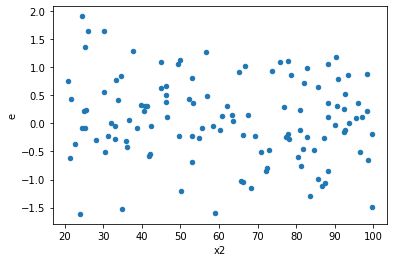

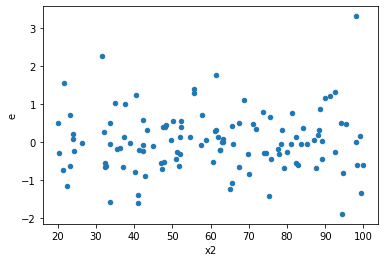

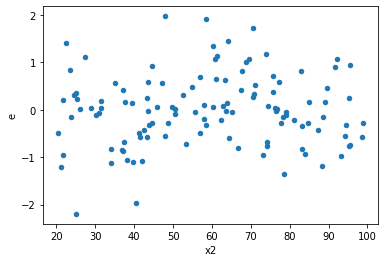

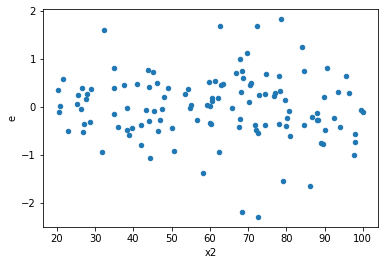

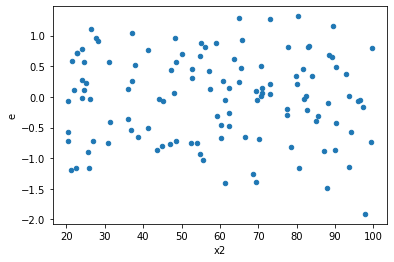

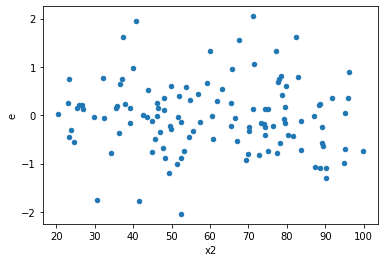

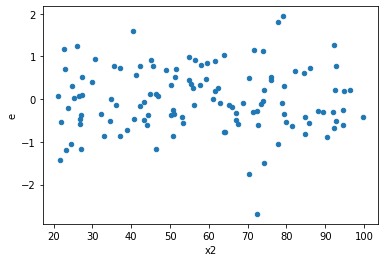

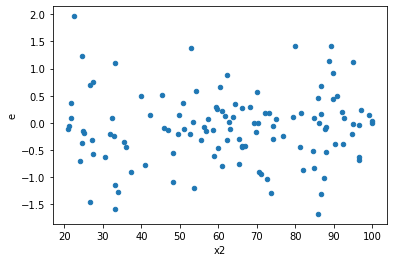

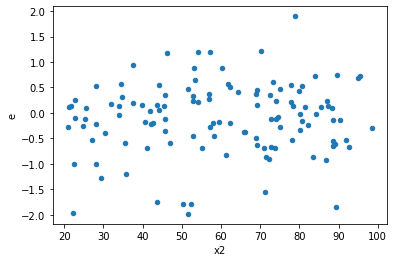

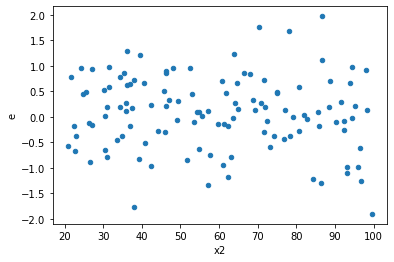

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,45.0,45.0,26.281909906492565,32.33643689391869,0.5840424423665015,0.7185874865315264,1.2303686074934164,0.48963756255304824,0.7551812187234759,0.24481878127652412,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,12.441716935806852,25.696527831376685,0.2764825985734856,0.5710339518083708,2.065352231043203,0.016681959458115125,0.9916590202709424,0.008340979729057563,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,19.702522092916084,24.390757709764195,0.4378338242870241,0.5420168379947599,1.2379510397064208,0.4768846609180999,0.76155766954095,0.23844233045904994,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,22.422877461390012,23.163581473370037,0.4982861658086669,0.5147462549637786,1.0330334058710995,0.9136780079758777,0.5431609960120611,0.45683900398793886,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,22.747993182868353,32.430380413715085,0.5055109596192967,0.7206751203047796,1.4256369848984567,0.23808836982290837,0.8809558150885458,0.11904418491145419,Reject001=1 : Homoscedasticity
9.0,45.0,45.0,18.979774417930358,26.3451224937361,0.42177276484289683,0.5854471665274689,1.388062993459376,0.27512922452863386,0.8624353877356831,0.13756461226431693,Reject001=1 : Homoscedasticity
12.0,45.0,45.0,17.600330611040636,21.128801939869533,0.3911184580231252,0.4695289319971007,1.200477559587176,0.5424953765358813,0.7287523117320593,0.27124768826794066,Reject001=1 : Homoscedasticity
16.0,45.0,45.0,18.856168607393315,24.58922817151675,0.4190259690531848,0.5464272927003723,1.304041594212069,0.37659489448053485,0.8117025527597326,0.18829744724026742,Reject001=1 : Homoscedasticity
17.0,45.0,45.0,20.426832388140358,24.231750338345417,0.4539296086253413,0.5384833408521204,1.1862705816499557,0.5690770459289896,0.7154614770355052,0.2845385229644948,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,24.974099397968413,22.684990629407444,0.5549799866215203,0.504110902875721,0.9083406880030604,0.7485123852954165,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,26.281909906492565,32.33643689391869,0.5840424423665015,0.7185874865315264,1.2303686074934164,0.48963756255304824,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,26.628678580347295,21.5968418577468,0.5917484128966065,0.47992981906104,0.8110369349565048,0.48519976727831476,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,12.441716935806852,25.696527831376685,0.2764825985734856,0.5710339518083708,2.065352231043203,0.016681959458115125,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,19.702522092916084,24.390757709764195,0.4378338242870241,0.5420168379947599,1.2379510397064208,0.4768846609180999,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,22.422877461390012,23.163581473370037,0.4982861658086669,0.5147462549637786,1.0330334058710995,0.9136780079758777,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,22.747993182868353,32.430380413715085,0.5055109596192967,0.7206751203047796,1.4256369848984567,0.23808836982290837,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,23.5454872237406,20.18086159282006,0.5232330494164578,0.4484635909515569,0.857101040256749,0.607194251331722,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,25.37798425546118,19.70725537866079,0.563955205676915,0.4379390084146842,0.776549279102808,0.3995508859316462,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      986
Reject001=0 : Heteroscedasticity     14
Name: Result_test, dtype: int64